In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import utm

from geopy.geocoders import Nominatim
import folium

# Loading Data

In [2]:
df = pd.read_csv(r'C:\Users\Sahil\Omdena\Detecting and Mitigating Traffic Accidents\datasets\cleaned2021.csv', parse_dates = ['Date'])
df

,Unnamed: 0,Accident_ID,Accident_Type,Date,Speed,Number_of_Minor_juries,Number_of_Severe_juries,Number_of_Deaths,Number_of_Moderate_juries,Road_Lanes,...,Longitude,latitude,minor,major,moderate,death,materials,humans,collision,runover
0,0,2331821,Collision,2021-01-30 10:30:00,40,0,0,0,0,one way,...,738016,3356370,0,0,0,0,1,0,1,0
1,1,2331821,Collision,2021-01-30 10:30:00,40,0,0,0,0,one way,...,738016,3356370,0,0,0,0,1,0,1,0
2,2,2338617,Collision,2021-03-01 18:35:00,60,0,0,0,0,two way without traffic island,...,737275,3356248,0,0,0,0,1,0,1,0
3,3,2338617,Collision,2021-03-01 18:35:00,60,0,0,0,0,two way without traffic island,...,737275,3356248,0,0,0,0,1,0,1,0
4,4,2339228,Collision,2021-05-01 09:13:00,40,0,0,0,0,two way without traffic island,...,738033,3356463,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,441,2546000,Collision,2021-12-28 14:16:00,70,0,0,0,0,two way without traffic island,...,737698,3356518,0,0,0,0,1,0,1,0
423,442,2546403,Collision,2021-12-29 10:56:00,40,0,0,0,0,two way without traffic island,...,751716,3403109,0,0,0,0,1,0,1,0
424,443,2546403,Collision,2021-12-29 10:56:00,40,0,0,0,0,two way without traffic island,...,751716,3403109,0,0,0,0,1,0,1,0
425,444,2546681,Collision,2021-12-29 17:45:00,50,0,0,0,0,one way,...,751987,3399310,0,0,0,0,1,0,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427 entries, 0 to 426
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Unnamed: 0                 427 non-null    int64         
 1   Accident_ID                427 non-null    int64         
 2   Accident_Type              427 non-null    object        
 3   Date                       427 non-null    datetime64[ns]
 4   Speed                      427 non-null    int64         
 5   Number_of_Minor_juries     427 non-null    int64         
 6   Number_of_Severe_juries    427 non-null    int64         
 7   Number_of_Deaths           427 non-null    int64         
 8   Number_of_Moderate_juries  427 non-null    int64         
 9   Road_Lanes                 427 non-null    object        
 10  Surface_Condition          427 non-null    object        
 11  Vehicle_Nationality        427 non-null    object        
 12  Drivg_Li

In [4]:
df.columns

Index(['Unnamed: 0', 'Accident_ID', 'Accident_Type', 'Date', 'Speed',
       'Number_of_Minor_juries', 'Number_of_Severe_juries', 'Number_of_Deaths',
       'Number_of_Moderate_juries', 'Road_Lanes', 'Surface_Condition',
       'Vehicle_Nationality ', 'Drivg_License_Category', 'Road_Type',
       'Lighting', 'Weather', 'Road_Characteristic ', 'Driver_Mistake',
       'Municipality ', 'Vehicle_Class', 'Date_of_Accident',
       'Number_of_Vehicles', 'Name', 'Driver_Age', 'Driver_Gender',
       'Accident_SerialNo', 'Accident_Date', 'Longitude', 'latitude', 'minor',
       'major', 'moderate', 'death', 'materials', 'humans', 'collision',
       'runover'],
      dtype='object')

In [5]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Time'] = df['Date'].dt.time
df['Weekday'] = df['Date'].dt.weekday.map({0:'Mon', 1:'Tue', 2:'Wed', 3:'Thurs', 4:'Fri', 5:'Sat', 6:'Sun'})
df['DateOnly'] = df['Date'].dt.date
df.head()

,Unnamed: 0,Accident_ID,Accident_Type,Date,Speed,Number_of_Minor_juries,Number_of_Severe_juries,Number_of_Deaths,Number_of_Moderate_juries,Road_Lanes,...,death,materials,humans,collision,runover,Year,Month,Time,Weekday,DateOnly
0,0,2331821,Collision,2021-01-30 10:30:00,40,0,0,0,0,one way,...,0,1,0,1,0,2021,1,10:30:00,Sat,2021-01-30
1,1,2331821,Collision,2021-01-30 10:30:00,40,0,0,0,0,one way,...,0,1,0,1,0,2021,1,10:30:00,Sat,2021-01-30
2,2,2338617,Collision,2021-03-01 18:35:00,60,0,0,0,0,two way without traffic island,...,0,1,0,1,0,2021,3,18:35:00,Mon,2021-03-01
3,3,2338617,Collision,2021-03-01 18:35:00,60,0,0,0,0,two way without traffic island,...,0,1,0,1,0,2021,3,18:35:00,Mon,2021-03-01
4,4,2339228,Collision,2021-05-01 09:13:00,40,0,0,0,0,two way without traffic island,...,0,1,0,1,0,2021,5,09:13:00,Sat,2021-05-01


In [7]:
df2 = df.sort_values(by=['DateOnly'])
df2

,Unnamed: 0,Accident_ID,Accident_Type,Date,Speed,Number_of_Minor_juries,Number_of_Severe_juries,Number_of_Deaths,Number_of_Moderate_juries,Road_Lanes,...,death,materials,humans,collision,runover,Year,Month,Time,Weekday,DateOnly
29,30,2359252,Collision,2021-01-02 19:30:00,50,0,0,0,0,two way without traffic island,...,0,1,0,1,0,2021,1,19:30:00,Sat,2021-01-02
28,29,2359252,Collision,2021-01-02 19:30:00,50,0,0,0,0,two way without traffic island,...,0,1,0,1,0,2021,1,19:30:00,Sat,2021-01-02
106,109,2404943,Collision,2021-01-05 12:04:00,40,0,0,0,0,two way without traffic island,...,0,1,0,1,0,2021,1,12:04:00,Tue,2021-01-05
166,171,2427697,Collision,2021-01-06 12:54:00,40,0,0,0,0,two way without traffic island,...,0,1,0,1,0,2021,1,12:54:00,Wed,2021-01-06
165,170,2427697,Collision,2021-01-06 12:54:00,40,0,0,0,0,two way without traffic island,...,0,1,0,1,0,2021,1,12:54:00,Wed,2021-01-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,438,2545923,Collision,2021-12-28 12:06:00,40,1,0,0,3,two way without traffic island,...,0,0,1,1,0,2021,12,12:06:00,Tue,2021-12-28
424,443,2546403,Collision,2021-12-29 10:56:00,40,0,0,0,0,two way without traffic island,...,0,1,0,1,0,2021,12,10:56:00,Wed,2021-12-29
425,444,2546681,Collision,2021-12-29 17:45:00,50,0,0,0,0,one way,...,0,1,0,1,0,2021,12,17:45:00,Wed,2021-12-29
423,442,2546403,Collision,2021-12-29 10:56:00,40,0,0,0,0,two way without traffic island,...,0,1,0,1,0,2021,12,10:56:00,Wed,2021-12-29


# Data Visualization

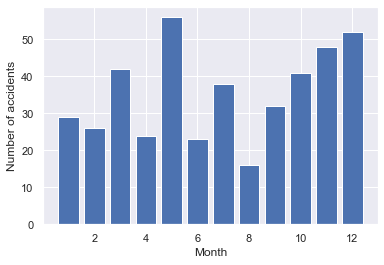

In [9]:
accidents_per_month = df['Month'].value_counts()
month = accidents_per_month.index
accidents_pm = accidents_per_month.values
plt.bar(month, accidents_pm)
plt.xlabel('Month')
plt.ylabel('Number of accidents')
plt.show()

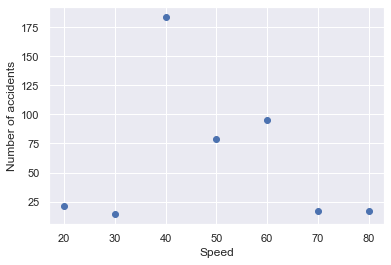

In [15]:
accidents_per_speed = df['Speed'].value_counts()
speed = accidents_per_speed.index
accidents_ps = accidents_per_speed.values
plt.scatter(speed, accidents_ps)
plt.xlabel('Speed')
plt.ylabel('Number of accidents')
plt.show()

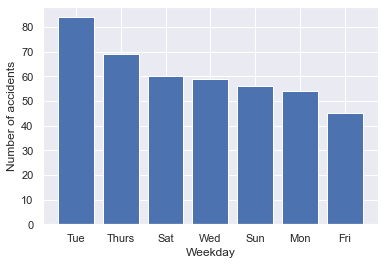

In [16]:
accidents_per_weekday = df['Weekday'].value_counts()
weekday = accidents_per_weekday.index
accidents_pwd = accidents_per_weekday.values
plt.bar(weekday, accidents_pwd)
plt.xlabel('Weekday')
plt.ylabel('Number of accidents')
plt.show()

In [17]:
cat_values = ['Road_Type', 'Drivg_License_Category', 'Road_Lanes', 'Surface_Condition', 'Lighting', 'Weather', 'Road_Characteristic ',
             'Municipality ', 'Vehicle_Class', 'Driver_Gender']

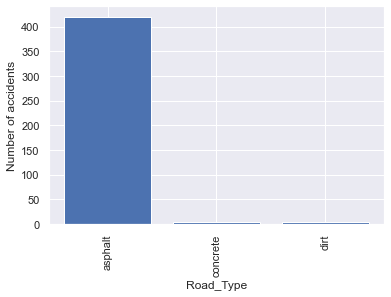

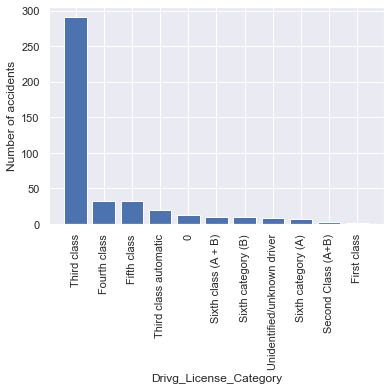

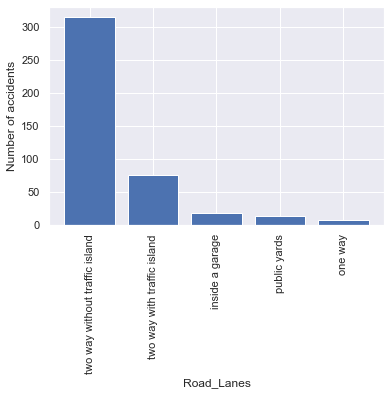

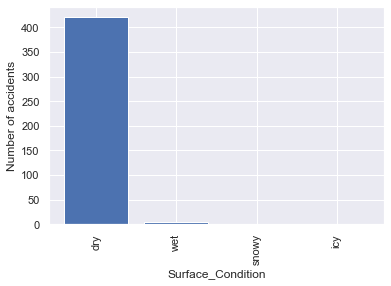

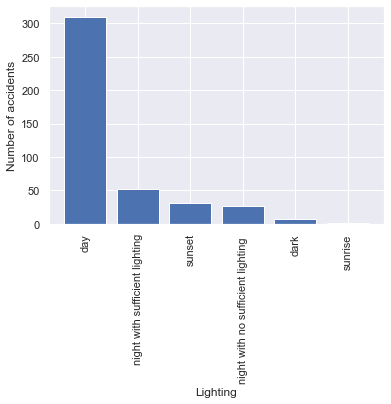

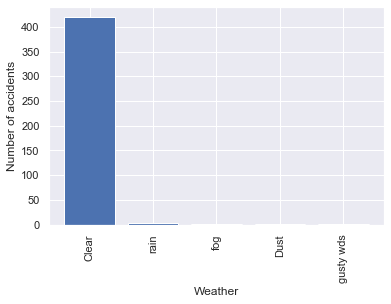

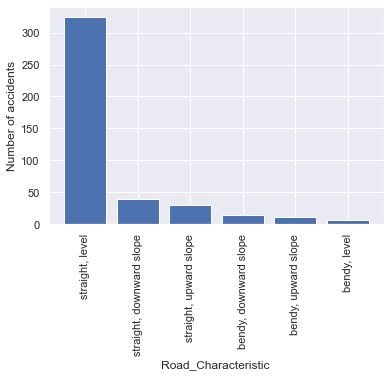

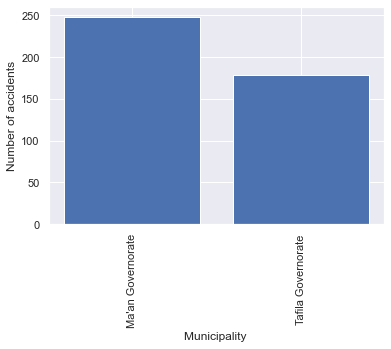

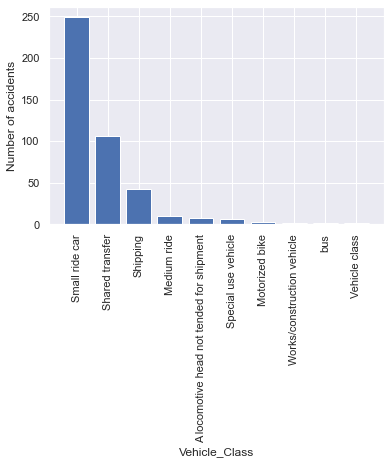

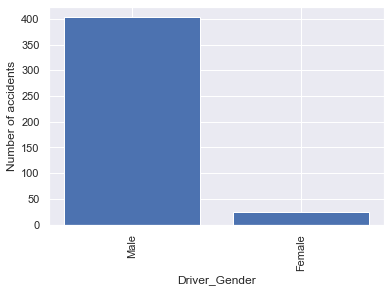

In [18]:
for i in range(len(cat_values)):
    acc = df[cat_values[i]].value_counts()
    x = acc.index
    y = acc.values
    plt.bar(x, y)
    plt.xlabel(cat_values[i])
    plt.ylabel('Number of accidents')
    plt.xticks(rotation = 90)
    plt.show()
    

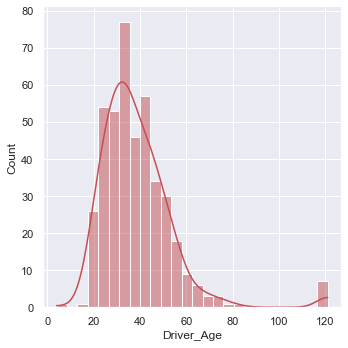

In [19]:
sns.displot(df['Driver_Age'], kde = True, color = 'r')

In [20]:
df['Driver_Age'].unique()

array([ 49.,  50.,  21.,  48.,  32.,  36.,  65.,  47.,  44.,  20.,  24.,
        29.,  42.,  45.,  18.,  26.,  41.,  22.,  64.,  39.,  33.,  34.,
        43.,  25.,  28.,  71.,  66.,  30.,  46.,  38.,  23.,  53.,  37.,
        31.,  77., 121.,  56.,  27.,  19.,  35.,  40.,  55.,  74.,  52.,
        58.,  54.,  16.,  75.,  60.,  68.,  73.,  82.,  63.,  59.,  57.,
         4.,  51.])

In [21]:
def groupAge(ages):
    output = []
    for i in range(len(ages)):
        if ages[i] < 18:
            output.append('Not eligible for driving')
        elif ages[i] >= 18 and ages[i] < 30:
            output.append('18-30')
        elif ages[i] >= 30 and ages[i] < 40:
            output.append('30-40')
        elif ages[i] >= 40 and ages[i] < 50:
            output.append('40-50')
        elif ages[i] >= 50 and ages[i] < 60:
            output.append('50-60')
        else:
            output.append('>60')
    return output
            

            

In [22]:
df['GroupAge'] = groupAge(df['Driver_Age'])
df.head()

,Unnamed: 0,Accident_ID,Accident_Type,Date,Speed,Number_of_Minor_juries,Number_of_Severe_juries,Number_of_Deaths,Number_of_Moderate_juries,Road_Lanes,...,materials,humans,collision,runover,Year,Month,Time,Weekday,DateOnly,GroupAge
0,0,2331821,Collision,2021-01-30 10:30:00,40,0,0,0,0,one way,...,1,0,1,0,2021,1,10:30:00,Sat,2021-01-30,40-50
1,1,2331821,Collision,2021-01-30 10:30:00,40,0,0,0,0,one way,...,1,0,1,0,2021,1,10:30:00,Sat,2021-01-30,50-60
2,2,2338617,Collision,2021-03-01 18:35:00,60,0,0,0,0,two way without traffic island,...,1,0,1,0,2021,3,18:35:00,Mon,2021-03-01,18-30
3,3,2338617,Collision,2021-03-01 18:35:00,60,0,0,0,0,two way without traffic island,...,1,0,1,0,2021,3,18:35:00,Mon,2021-03-01,40-50
4,4,2339228,Collision,2021-05-01 09:13:00,40,0,0,0,0,two way without traffic island,...,1,0,1,0,2021,5,09:13:00,Sat,2021-05-01,30-40


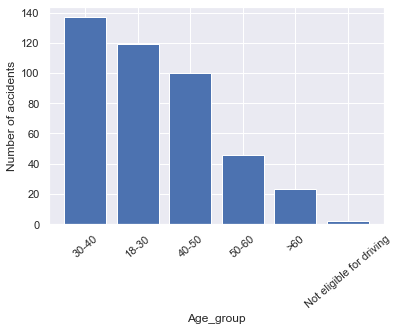

In [23]:
accidents_per_agegroup = df['GroupAge'].value_counts()
agegroup = accidents_per_agegroup.index
accidents_pag = accidents_per_agegroup.values
plt.bar(agegroup, accidents_pag)
plt.xlabel('Age_group')
plt.ylabel('Number of accidents')
plt.xticks(rotation = 40)
plt.show()

In [24]:
def getHour(timing):
    output = []
    for i in range(len(timing)):
        hour = timing[i].strftime("%H:%M:%S").split(":")[0]
        output.append(hour)
    return output
    

In [25]:
df['Hour'] = getHour(df['Time'])
df['Hour'] = pd.to_numeric(df['Hour'])
df.head()

,Unnamed: 0,Accident_ID,Accident_Type,Date,Speed,Number_of_Minor_juries,Number_of_Severe_juries,Number_of_Deaths,Number_of_Moderate_juries,Road_Lanes,...,humans,collision,runover,Year,Month,Time,Weekday,DateOnly,GroupAge,Hour
0,0,2331821,Collision,2021-01-30 10:30:00,40,0,0,0,0,one way,...,0,1,0,2021,1,10:30:00,Sat,2021-01-30,40-50,10
1,1,2331821,Collision,2021-01-30 10:30:00,40,0,0,0,0,one way,...,0,1,0,2021,1,10:30:00,Sat,2021-01-30,50-60,10
2,2,2338617,Collision,2021-03-01 18:35:00,60,0,0,0,0,two way without traffic island,...,0,1,0,2021,3,18:35:00,Mon,2021-03-01,18-30,18
3,3,2338617,Collision,2021-03-01 18:35:00,60,0,0,0,0,two way without traffic island,...,0,1,0,2021,3,18:35:00,Mon,2021-03-01,40-50,18
4,4,2339228,Collision,2021-05-01 09:13:00,40,0,0,0,0,two way without traffic island,...,0,1,0,2021,5,09:13:00,Sat,2021-05-01,30-40,9


In [26]:
df['Hour'].unique()

array([10, 18,  9, 17, 14, 12, 16, 15,  6, 11, 19, 13,  8, 21,  4,  0, 20,
        2,  1, 22, 23,  3,  7,  5], dtype=int64)

<AxesSubplot:xlabel='Hour', ylabel='Count'>

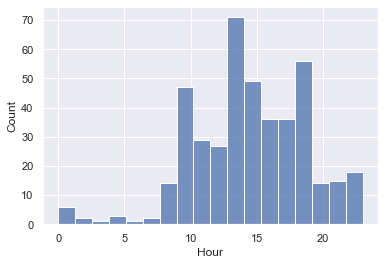

In [30]:
sns.histplot(df['Hour'])

In [27]:
def groupHour(hours):
    output = []
    for i in range(len(hours)):
        if hours[i] >= 0 and hours[i] < 6:
            output.append('0-6')
        elif hours[i] >= 6 and hours[i] < 12:
            output.append('6-12')
        elif hours[i] >= 12 and hours[i] < 18:
            output.append('12-18')
        else:
            output.append('> 18')
    return output



In [28]:
df['groupHour'] = groupHour(df['Hour'])
df.head()

,Unnamed: 0,Accident_ID,Accident_Type,Date,Speed,Number_of_Minor_juries,Number_of_Severe_juries,Number_of_Deaths,Number_of_Moderate_juries,Road_Lanes,...,collision,runover,Year,Month,Time,Weekday,DateOnly,GroupAge,Hour,groupHour
0,0,2331821,Collision,2021-01-30 10:30:00,40,0,0,0,0,one way,...,1,0,2021,1,10:30:00,Sat,2021-01-30,40-50,10,6-12
1,1,2331821,Collision,2021-01-30 10:30:00,40,0,0,0,0,one way,...,1,0,2021,1,10:30:00,Sat,2021-01-30,50-60,10,6-12
2,2,2338617,Collision,2021-03-01 18:35:00,60,0,0,0,0,two way without traffic island,...,1,0,2021,3,18:35:00,Mon,2021-03-01,18-30,18,> 18
3,3,2338617,Collision,2021-03-01 18:35:00,60,0,0,0,0,two way without traffic island,...,1,0,2021,3,18:35:00,Mon,2021-03-01,40-50,18,> 18
4,4,2339228,Collision,2021-05-01 09:13:00,40,0,0,0,0,two way without traffic island,...,1,0,2021,5,09:13:00,Sat,2021-05-01,30-40,9,6-12


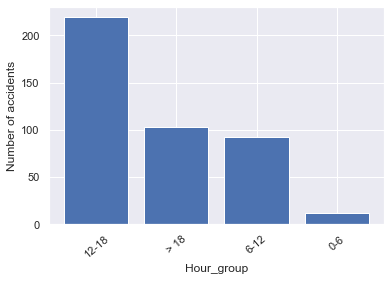

In [29]:
accidents_per_hourgroup = df['groupHour'].value_counts()
hourgroup = accidents_per_hourgroup.index
accidents_phg = accidents_per_hourgroup.values
plt.bar(hourgroup, accidents_phg)
plt.xlabel('Hour_group')
plt.ylabel('Number of accidents')
plt.xticks(rotation = 40)
plt.show()

# Checking holidays

In [37]:
dfh = pd.read_csv(r'C:\Users\Sahil\Omdena\Detecting and Mitigating Traffic Accidents\datasets\Jordan_Holidays_2021.csv', parse_dates = ['Date'])
dfh

,Date,Weekday,Holiday_name,Holiday_type
0,2021-01-01,Friday,New Year's Day,National holiday
1,2021-02-18,Thursday,Public Holiday (Bad Weather),National holiday
2,2021-03-11,Thursday,Al Isra' wal Miraj,Observance
3,2021-03-20,Saturday,March Equinox,Season
4,2021-03-28,Sunday,Palm Sunday,Optional Holiday
5,2021-04-02,Friday,Good Friday,Observance
6,2021-04-04,Sunday,Easter Sunday,Observance
7,2021-04-05,Monday,Easter Monday,Observance
8,2021-04-11,Sunday,Centenary Celebration Holiday,National holiday
9,2021-04-13,Tuesday,Ramadan begins,Observance


In [38]:
dfh['Date'][0]

Timestamp('2021-01-01 00:00:00')

In [39]:
dfh['DateOnly'] = dfh['Date'].dt.date
dfh.head()

,Date,Weekday,Holiday_name,Holiday_type,DateOnly
0,2021-01-01,Friday,New Year's Day,National holiday,2021-01-01
1,2021-02-18,Thursday,Public Holiday (Bad Weather),National holiday,2021-02-18
2,2021-03-11,Thursday,Al Isra' wal Miraj,Observance,2021-03-11
3,2021-03-20,Saturday,March Equinox,Season,2021-03-20
4,2021-03-28,Sunday,Palm Sunday,Optional Holiday,2021-03-28


In [40]:
dfh['DateOnly'][0]

datetime.date(2021, 1, 1)

In [53]:
holiday_type = []

for i in range(len(df)):
    for j in range(len(dfh)):
        if df['DateOnly'][i] == dfh['DateOnly'][j]:
            holiday_type.append(dfh['Holiday_type'][j])
            break
        if j == len(dfh) - 1:
            holiday_type.append('No holiday')
            
        
len(holiday_type)

427

In [54]:
df['HolidayType'] = holiday_type
df.head()

,Unnamed: 0,Accident_ID,Accident_Type,Date,Speed,Number_of_Minor_juries,Number_of_Severe_juries,Number_of_Deaths,Number_of_Moderate_juries,Road_Lanes,...,runover,Year,Month,Time,Weekday,DateOnly,GroupAge,Hour,groupHour,HolidayType
0,0,2331821,Collision,2021-01-30 10:30:00,40,0,0,0,0,one way,...,0,2021,1,10:30:00,Sat,2021-01-30,40-50,10,6-12,No holiday
1,1,2331821,Collision,2021-01-30 10:30:00,40,0,0,0,0,one way,...,0,2021,1,10:30:00,Sat,2021-01-30,50-60,10,6-12,No holiday
2,2,2338617,Collision,2021-03-01 18:35:00,60,0,0,0,0,two way without traffic island,...,0,2021,3,18:35:00,Mon,2021-03-01,18-30,18,> 18,No holiday
3,3,2338617,Collision,2021-03-01 18:35:00,60,0,0,0,0,two way without traffic island,...,0,2021,3,18:35:00,Mon,2021-03-01,40-50,18,> 18,No holiday
4,4,2339228,Collision,2021-05-01 09:13:00,40,0,0,0,0,two way without traffic island,...,0,2021,5,09:13:00,Sat,2021-05-01,30-40,9,6-12,National holiday


In [55]:
df['HolidayType'].value_counts()

No holiday          383
National holiday     31
Season                8
Optional Holiday      4
Observance            1
Name: HolidayType, dtype: int64

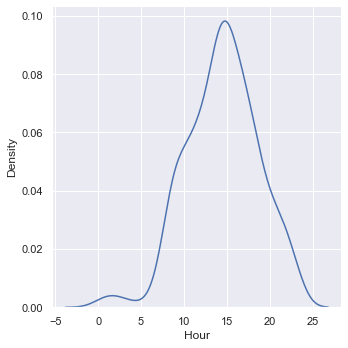

In [62]:
df_no_holiday = df[df['HolidayType'] == 'No holiday']
sns.displot(df_no_holiday['Hour'], kind = 'kde')

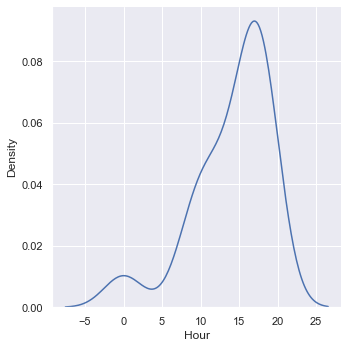

In [64]:
df_nat_holiday = df[df['HolidayType'] == 'National holiday']
sns.displot(df_nat_holiday['Hour'], kind = 'kde')

<Figure size 1080x720 with 0 Axes>

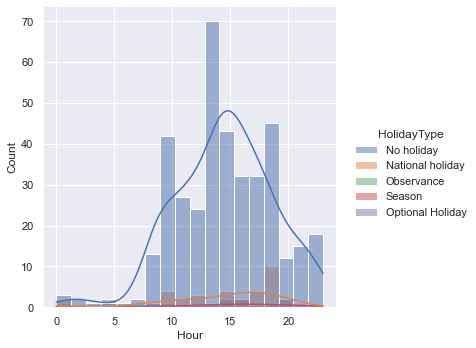

In [69]:
plt.figure(figsize = (15, 10))
sns.displot(data = df, x = 'Hour', hue = 'HolidayType', kde = True)

# Plotting co-ordinates on map

In [3]:
def utm_to_latlon(dataframe, zone_number, zone_letter):
    easting = dataframe['Longitude']
    northing = dataframe['latitude']
    
    lat = utm.to_latlon(easting, northing, zone_number, zone_letter)[0]
    long = utm.to_latlon(easting, northing, zone_number, zone_letter)[1]
    
    return lat, long


df['lat'], df['long'] = utm_to_latlon(df, zone_number=36, zone_letter='R')
df.head()

,Unnamed: 0,Accident_ID,Accident_Type,Date,Speed,Number_of_Minor_juries,Number_of_Severe_juries,Number_of_Deaths,Number_of_Moderate_juries,Road_Lanes,...,minor,major,moderate,death,materials,humans,collision,runover,lat,long
0,0,2331821,Collision,2021-01-30 10:30:00,40,0,0,0,0,one way,...,0,0,0,0,1,0,1,0,30.315749,35.475319
1,1,2331821,Collision,2021-01-30 10:30:00,40,0,0,0,0,one way,...,0,0,0,0,1,0,1,0,30.315749,35.475319
2,2,2338617,Collision,2021-03-01 18:35:00,60,0,0,0,0,two way without traffic island,...,0,0,0,0,1,0,1,0,30.314795,35.467591
3,3,2338617,Collision,2021-03-01 18:35:00,60,0,0,0,0,two way without traffic island,...,0,0,0,0,1,0,1,0,30.314795,35.467591
4,4,2339228,Collision,2021-05-01 09:13:00,40,0,0,0,0,two way without traffic island,...,0,0,0,0,1,0,1,0,30.316584,35.475517


In [ ]:
#df.to_excel('cleaned2021_SK.xlsx', index = False)

In [4]:
address = 'Jordan'

geolocator = Nominatim(user_agent="jordan_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Jordan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Jordan are 31.1667049, 36.941628.


In [6]:
# create map of Jordan using latitude and longitude values
map_jordan = folium.Map(location=[latitude, longitude], zoom_start=6, tiles="OpenStreetMap")

# add markers to map
for lat, lng, accident in zip(df['lat'], df['long'], df['Accident_ID']):
    label = '{}'.format(accident)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=4,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_jordan)  
    
map_jordan